<a href="https://colab.research.google.com/github/Aishwarya240/AIES_LAB/blob/main/Experiment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex 3: Transparency in AI Decision-Making

Objective: To compare transparent vs. black-box models.


To compare a transparent model (Decision Tree) and a black-box model (Random Forest) and understand how transparency in AI decision-making affects trust, interpretability, and ethical implications.

In [1]:
# Import libraries
from sklearn.datasets import load_wine # importing wine dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the Wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Train Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

DecisionTreeClassifier(max_depth=4): Limits tree depth to 4 (for readability).

.fit(): Trains the tree on training data.

.predict(): Uses the trained model to predict outcomes for test data.

In [6]:
# Train Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

RandomForestClassifier(n_estimators=100): Uses 100 trees in the forest.

More trees → better accuracy, but harder to interpret.

.fit() and .predict() as above.

In [7]:
# Evaluate both models
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

In [8]:
print("Decision Tree Accuracy:", acc_tree)
print("Random Forest Accuracy:", acc_forest)

Decision Tree Accuracy: 0.9629629629629629
Random Forest Accuracy: 1.0


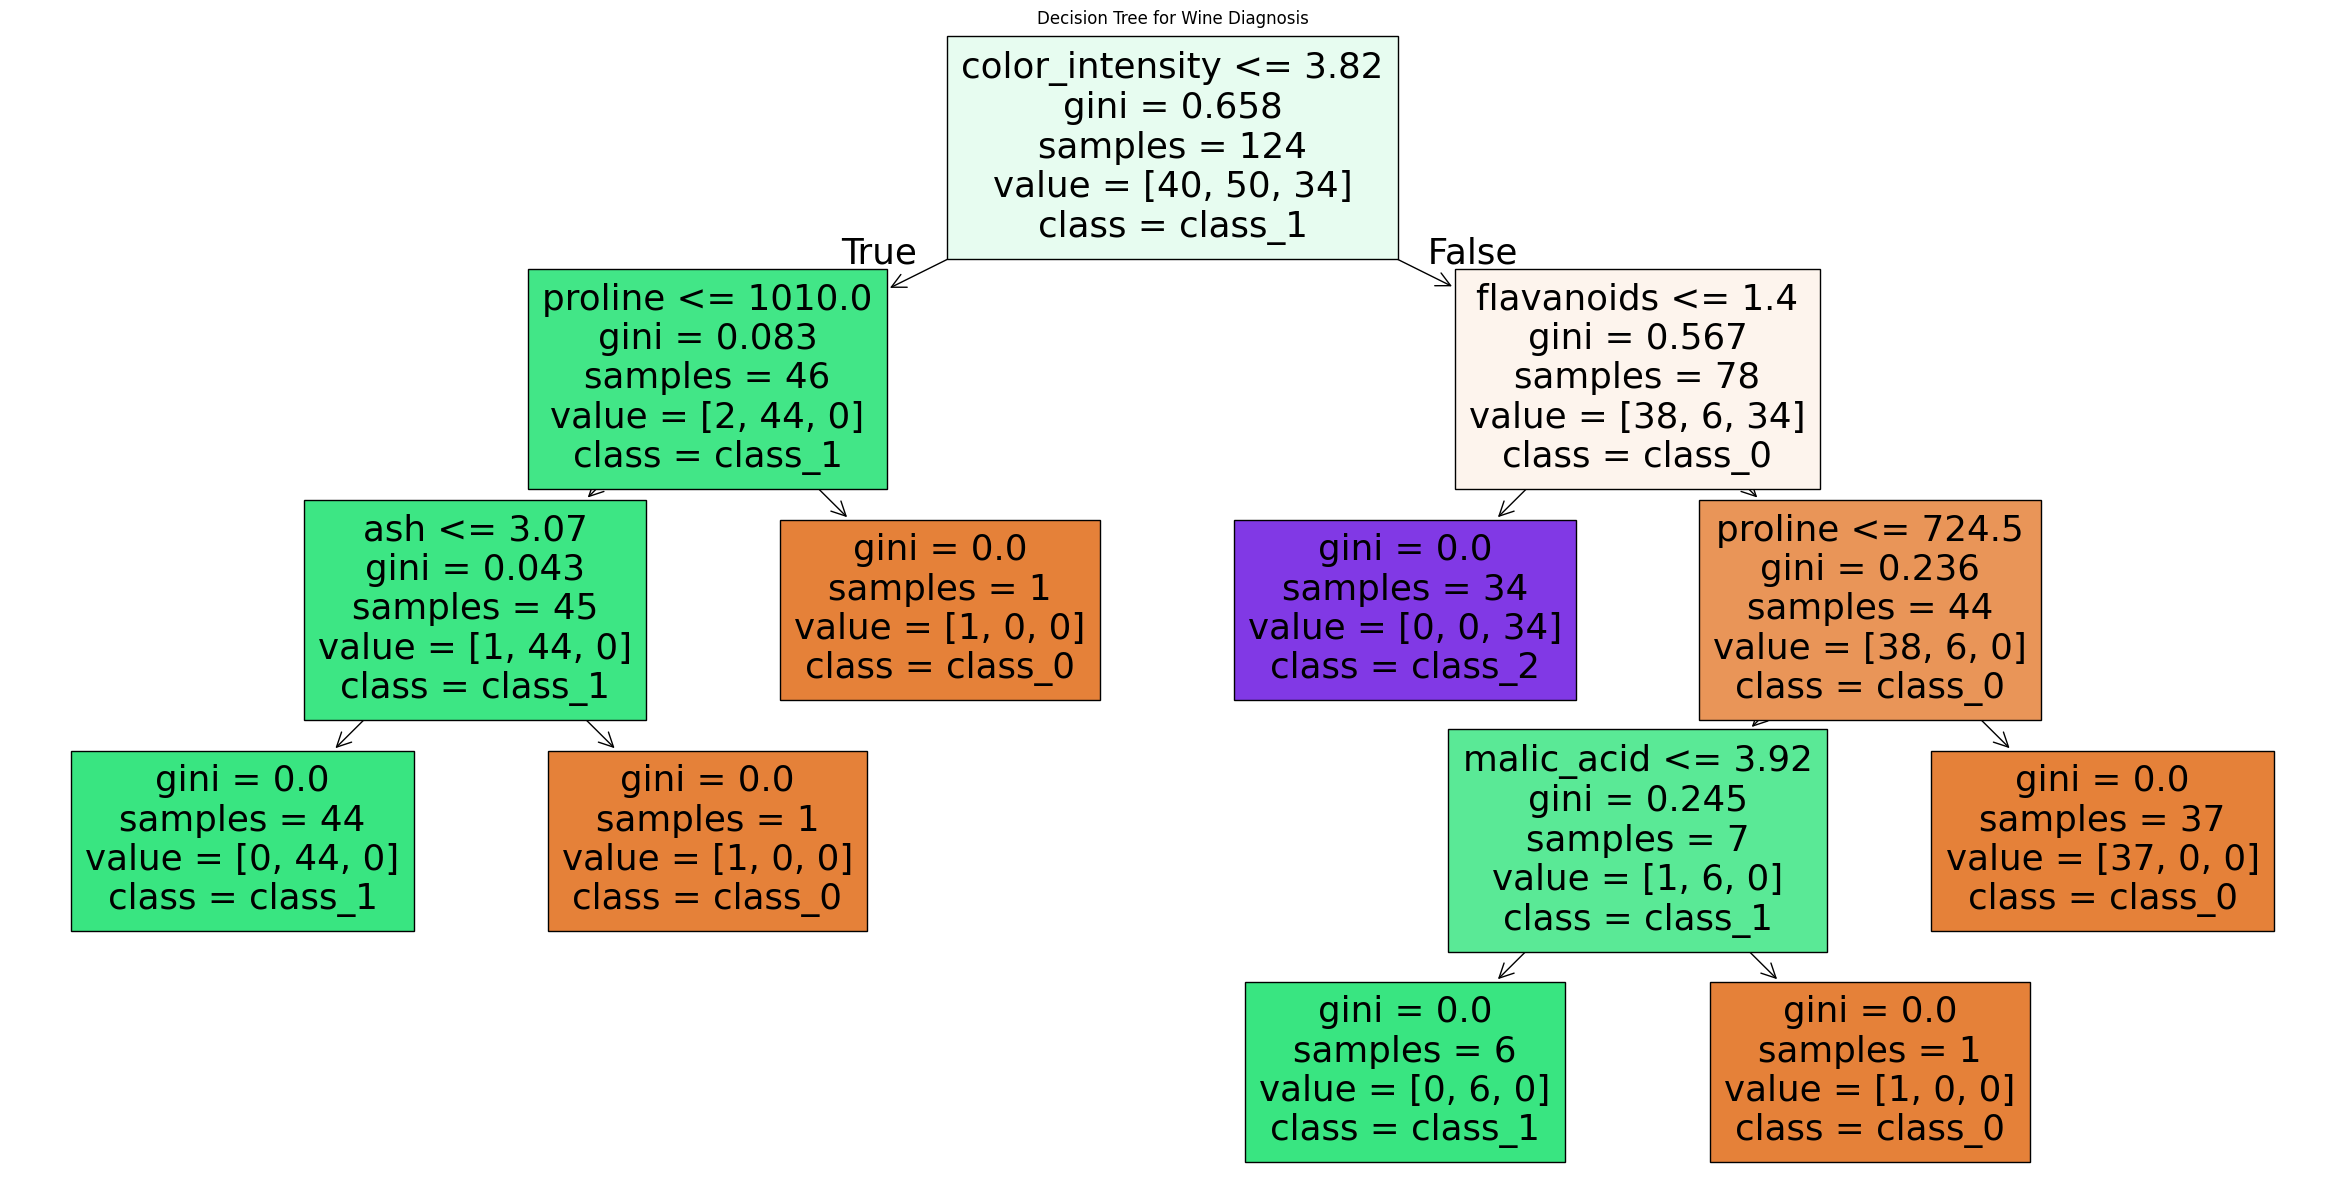

In [9]:
# Visualize Decision Tree
plt.figure(figsize=(30, 15))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree for Wine Diagnosis")
plt.show()

In [10]:
# Classification report (optional for deeper analysis)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



In [11]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## Conclusion

This analysis compared a Decision Tree (transparent) and a Random Forest (black-box) model on the Wine dataset. The Random Forest achieved perfect accuracy (1.0), outperforming the Decision Tree (0.96). While the Random Forest was more accurate, the Decision Tree offered valuable transparency, visualized above, allowing for clear understanding of its classification rules based on features like color intensity and proline. The choice depends on whether the priority is predictive performance (Random Forest) or interpretability and trust (Decision Tree).